In [46]:
#starting with the importinf libraries 
import torch;
import torch.nn as nn

In [47]:
# Create a sample small data 
x = torch.arange(0,1,0.1).unsqueeze(1)
y = x*2 + 1

In [48]:
x_test = torch.tensor([[0.15],[0.55],[0.85]])
y_test = x_test * 2 + 1

In [49]:
# Creating a model
model = nn.Sequential(
    nn.Linear(1,1,)
)

In [50]:
# calculating the loss
loss_Fn = nn.L1Loss()
# help to learn the model effectively
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)

In [51]:
epchoes = 200

#Training loop 
for epoch in range(epchoes):
    model.train()
    y_pred = model(x)
    loss = loss_Fn(y_pred,y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10 ==0:
        print(epoch , loss.item())

0 2.9034512042999268
10 2.7832016944885254
20 2.6629514694213867
30 2.5427019596099854
40 2.422452211380005
50 2.3022022247314453
60 2.1819522380828857
70 2.061702251434326
80 1.9414523839950562
90 1.8212026357650757
100 1.7009528875350952
110 1.580702781677246
120 1.4604530334472656
130 1.340203046798706
140 1.2199530601501465
150 1.0997031927108765
160 0.9840813875198364
170 0.8998311758041382
180 0.8155810236930847
190 0.746884822845459


In [52]:
model.eval()
test_loss = 0
with torch.inference_mode():
    y_test_pred = model(x_test)
    testLoss = loss_Fn(y_test_pred,y_test)

In [53]:
for name , params in model.named_parameters():
    print(name,params.data)

0.weight tensor([[-0.0332]])
0.bias tensor([1.3031])


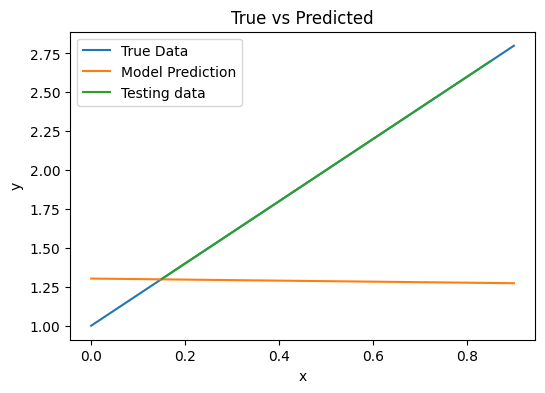

In [54]:
import matplotlib.pyplot as plt

with torch.inference_mode():
    y_pred = model(x)
    
plt.figure(figsize=(6,4))
plt.plot(x, y, label="True Data")           # original line (y = 2x + 1)
plt.plot(x, y_pred, label="Model Prediction")
plt.plot(x_test,y_test ,label="Testing data")
plt.legend()
plt.title("True vs Predicted")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [55]:
model.state_dict()

OrderedDict([('0.weight', tensor([[-0.0332]])), ('0.bias', tensor([1.3031]))])

### Saving a model in pytorch
There are three main types of methods that are used for saving and loading model in pytorch

1. **torch.save()** - allows you to savve a pytorch object in pickle format
2. **torch.load()** - allow you to load a saved Pytorch object
3. **torch.nn.Module.load_state_dict()** - this allows to load a model's saved state dictionary

In [37]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True , exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_).pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

MODEL_SAVE_PATH

torch.save(obj=model.state_dict(),
           f=MODEL_SAVE_PATH)

In [56]:
ls -l models


 Volume in drive C is OS
 Volume Serial Number is FCEF-C115

 Directory of c:\Users\anant\OneDrive\Desktop\AI\Deep learning\workflow


 Directory of c:\Users\anant\OneDrive\Desktop\AI\Deep learning\workflow\models

11/23/2025  10:42 AM    <DIR>          .
11/23/2025  10:51 AM    <DIR>          ..
11/23/2025  10:42 AM             2,181 01_pytorch_workflow_model_).pth
               1 File(s)          2,181 bytes
               2 Dir(s)  317,137,924,096 bytes free


File Not Found


### Loading a pytorch model

Since we saved our model's state dict() rather than entire model we'll create a new instance of our model class and **state_dict()** into that

In [ ]:
import torch

# To load in a saved state_dict we have to instatiate a new instance of our model class
loaded_model = LinearRegressionModel()

loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

NameError: name 'LinearRegressionModel' is not defined